In [3]:
import numpy as np                       #matemática básica
import matplotlib.pyplot as plt          #plotagem de gráficos
import matplotlib.animation as animation #animações
from scipy.integrate import solve_ivp    #solução de EDOs

# Resolução de EDOs

## Partícula Livre

Implicitamente, quando vamos estudar um fenômeno, definimos um **modelo** para ele, que contém todas as variáveis de interesse. No caso do movimento, as variáveis de interesse são

1. Posição;
2. Velocidade;
3. Equações de movimento;

Vamos agora implementar isso definindo uma função que, dado um instante de tempo, nos fornece tais informações. As equações de movimento escritas serão de primeira ordem para facilitar a resoluçaõ numérica.

In [4]:
def model1(t,y):      #aqui y é uma lista que carrega as informações que queremos
  x = y[0]            #a posição é o primeiro elemento da lista
  v = y[1]            #a velocidade é o segundo
  dxdt = v
  dvdt = 0            #equação diferencial da partícula livre
  return [dxdt,dvdt]  #retorna uma lista com a variação das variáveis de interesse

In [5]:
x0 = 0.0      #posição inicial
v0 = 1.0      #velocidade inicial
y0 = [x0,v0]  #array 1D (vetor) das condições iniciais

#precisamos agora resolver o problema. O computador faz isso de forma interativa, rodando a equação em intervalos $\Delta t$ pequenos.

#vamos agora definir tal intervalo:
Δt = (0,20) # t_inicial = 0, t_final = 20

sol1 = solve_ivp(model1,Δt,y0,max_step=0.05,args=())
 # ESSA é a linha que resolve equação diferencial  

In [6]:
type(sol1.t) # valores do tempo que geramos
print(sol1.t)

[0.00000000e+00 9.99000999e-04 1.09890110e-02 6.09890110e-02
 1.10989011e-01 1.60989011e-01 2.10989011e-01 2.60989011e-01
 3.10989011e-01 3.60989011e-01 4.10989011e-01 4.60989011e-01
 5.10989011e-01 5.60989011e-01 6.10989011e-01 6.60989011e-01
 7.10989011e-01 7.60989011e-01 8.10989011e-01 8.60989011e-01
 9.10989011e-01 9.60989011e-01 1.01098901e+00 1.06098901e+00
 1.11098901e+00 1.16098901e+00 1.21098901e+00 1.26098901e+00
 1.31098901e+00 1.36098901e+00 1.41098901e+00 1.46098901e+00
 1.51098901e+00 1.56098901e+00 1.61098901e+00 1.66098901e+00
 1.71098901e+00 1.76098901e+00 1.81098901e+00 1.86098901e+00
 1.91098901e+00 1.96098901e+00 2.01098901e+00 2.06098901e+00
 2.11098901e+00 2.16098901e+00 2.21098901e+00 2.26098901e+00
 2.31098901e+00 2.36098901e+00 2.41098901e+00 2.46098901e+00
 2.51098901e+00 2.56098901e+00 2.61098901e+00 2.66098901e+00
 2.71098901e+00 2.76098901e+00 2.81098901e+00 2.86098901e+00
 2.91098901e+00 2.96098901e+00 3.01098901e+00 3.06098901e+00
 3.11098901e+00 3.160989

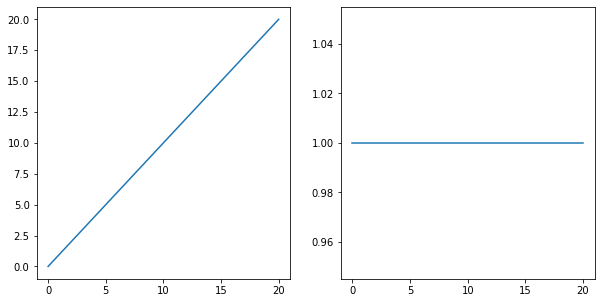

In [7]:
fig, ax = plt.subplots(1,2,figsize=(10,5)) #posição e velocidades lado a lado
#ax.grid(True)

ax[0].plot(sol1.t,sol1.y[0]) #posição em função do tempo
ax[1].plot(sol1.t,sol1.y[1]) #velocidade em função do tempo

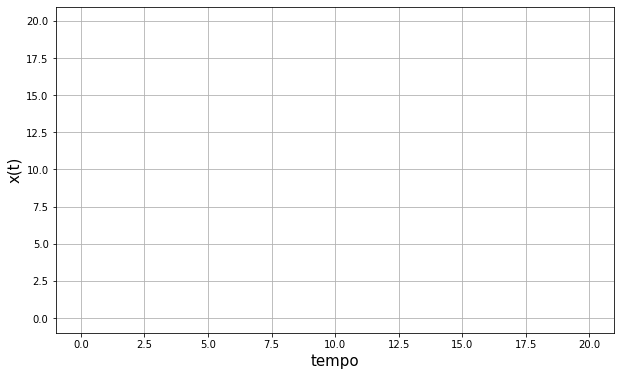

In [8]:
fig1, ax =  plt.subplots(figsize=(10,6))
ax.grid(True)

ax.set_ylabel('x(t)', fontsize=15)
ax.set_xlabel('tempo', fontsize=15)

lines = []
for i in range(len(sol1.t)):
  line1, = ax.plot(sol1.t[:i], sol1.y[0,:i], linestyle='-', color='black') 
  lines.append([line1]) #lista de gráficos

ani1 = animation.ArtistAnimation(fig1, lines, interval=10)

In [9]:
plt.rcParams['animation.html'] = 'html5'
ani1

Podemos também fazer uma sequência de gráficos variando as condições iniciais:

In [10]:
x0 = 1.0
y0 = 1.0
sols1 = []
for i in range(5):
  x0 = 1.0+i        #posição inicial dependente do contador
  v0 = 1.0*i        #velocidade inicial dependente do contador
  y0 = [x0,v0]      #note que as condições iniciais são atualizadas cada vez que o contador roda
  sols1.append(solve_ivp(model1,Δt,y0,max_step=0.05,args=()))

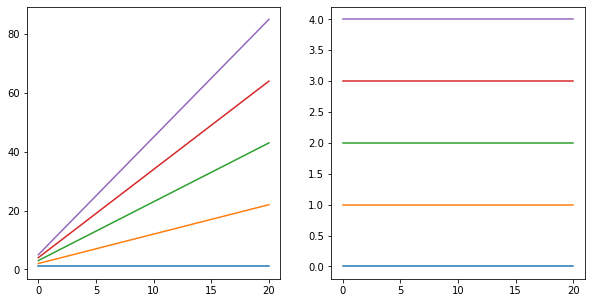

In [11]:
fig2, ax2 = plt.subplots(1,2,figsize=(10,5))    #novos gráficos
for i in range(5):
  ax2[0].plot(sols1[i].t,sols1[i].y[0])         #posições em função do tempo
  ax2[1].plot(sols1[i].t,sols1[i].y[1])         #velocidades em função do tempo

## Oscilador harmônico


Neste caso as equações diferenciais são

\begin{align}
  v & = \frac{dx}{dt} \, , \\
  m\frac{dv}{dt} & = -kx \, ,
\end{align}

sendo necessário apenas repetir os passos anteriores. A única diferença é que precisamos incluir a massa $m$ e a constante de mola $k$ em nosso modelo.

In [12]:
def model2(t,y,m,k): #incluimos os dois parâmetros extras em nosso modelo
  x = y[0]
  v = y[1]
  dxdt = v
  dvdt = -(k/m)*x   #apenas a equação diferencial mudou, o procedimento que seguiremos é exatamente o mesmo
  return [dxdt,dvdt]

Agora basta repetir os procedimentos anteriores. Vamos então definir as condições inciais e pedir para o computador resolver a equação diferencial.

In [13]:
x02 = 1.0
v02 = 1.0
y02 = [x02,v02]  #vetor de estado do sistema
m = 1.0          #massa da partícula
k = 1.0          #constante da mola
Δt = (0,20)      #intervalo de tempo

sol2 = solve_ivp(model2,Δt,y02,max_step=0.05,args=(m,k))

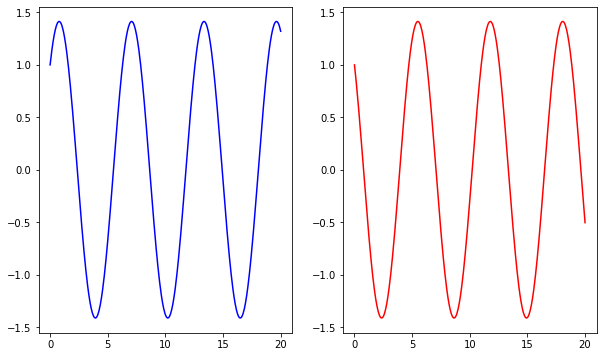

In [14]:
fig2, ax2 = plt.subplots(1,2, figsize=(10,6))

ax2[0].plot(sol2.t,sol2.y[0], color='blue')
ax2[1].plot(sol2.t,sol2.y[1], color='red')

Vamos agora fazer uma animação do oscilador harmônico.

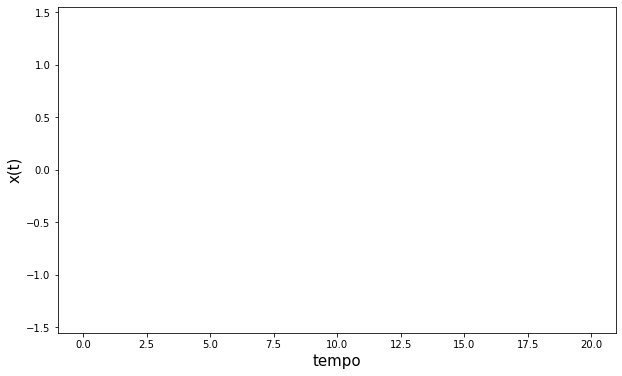

In [15]:
fig2, ax2 =  plt.subplots(figsize=(10,6))  #definindo o gráfico
ax.grid(True)                             #grade do gráfico

ax2.set_ylabel('x(t)', fontsize=15)  #legenda
ax2.set_xlabel('tempo', fontsize=15)

lines2 = []
for i in range(len(sol2.t)):
  line2, = ax2.plot(sol2.t[:i], sol2.y[0,:i], linestyle='-', color='black') 
  lines2.append([line2]) #lista de gráficos

ani2 = animation.ArtistAnimation(fig2, lines2, interval=10)

In [16]:
plt.rcParams['animation.html'] = 'html5'
ani2

Agora vamos resolver variando as condições iniciais:

In [17]:
sols2 = []
for i in range(5):
  yi = [2*i,3+i]
  sols2.append(solve_ivp(model2,Δt,yi,max_step=0.05,args=(m,k)))  

E os gráficos ficam:

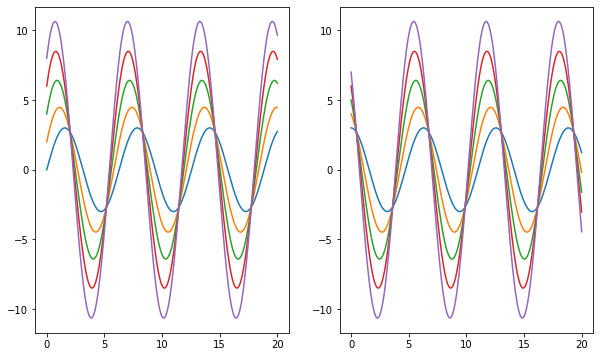

In [18]:
fig3, axs2 = plt.subplots(1,2, figsize=(10,6))
for i in range(5):
  axs2[0].plot(sols2[i].t,sols2[i].y[0])
  axs2[1].plot(sols2[i].t,sols2[i].y[1])

Podemos também plotar as soluções no espaço de fase:

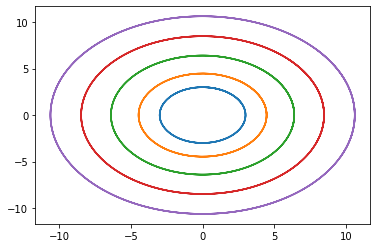

In [19]:
for i in range(5):
  plt.plot(sols2[i].y[0],sols2[i].y[1])           # essa linha plota a velocidade em função da posição

### Atividade: Oscilador Harmônico Forçado

Implemente a resolução do modelo de um sistema massa mola submetido a uma força externa $F$ constante, cujas equações diferenciais são:

\begin{align} 
  & \frac{dx}{dt} = v \\
  & \frac{dv}{dt} = -kx+F \, .
\end{align} 

Você deve 

1. Resolver a equação em Python;
2. Plotar os gráficos de posição e velocidade;
3. Fazer uma animação da solução;
4. Plotar os gráficos variando as condições iniciais;

**Dica**: considere $F$ como um parâmetro extra no seu modelo.

### Para casa

Implemente a resolução do modelo de um sistema massa mola *amortecido *submetido a uma força externa $F$ constante, cujas equações diferenciais são:

\begin{align} 
  & \frac{dx}{dt} = v\, , \\
  & \frac{dv}{dt} = -kx-bv+F \, .
\end{align} 

Você deve 

1. Resolver a equação em Python;
2. Plotar os gráficos de posição e velocidade;
3. Fazer uma animação da solução;
4. Plotar os gráficos variando as condições iniciais;

Em seguida, fixe as condições iniciais e varie os parâmetros $b$ e $k$, e plote um gráfico comparando os casos sub amortecido, amortecimento crítico e super amortecido.

# Estudo de órbitas

## Órbitas Newtonianas

Na teoria da gravitação newtoniana, a gravidade é descrita por uma lei de força

$$\vec{F}(r) =  -\frac{GMm}{r^{2}}\hat{r} \, ,$$

neste modelo, temos a conservação da energia e do momento angular:

\begin{align}
   E & = \frac{1}{2}m\dot{r}^{2}+\frac{1}{2}mr^{2}\dot{\theta}^{2}-\frac{GMm}{r}\, , \\
  p_{\theta} &  = mr^{2}\dot{\theta}\, .
\end{align}

Para obter a equação que rege as órbitas, definimos

\begin{align}
  u & = \frac{1}{r}\, , \\
  h & = \frac{p_{\theta}}{m}\, .
\end{align}

Reexpressando a energia em termos dessas variáveis, obtemos

$$ E\left(u,\frac{du}{d \theta}\right) = \frac{1}{2}mh^{2}\left[u^{2}+\left(\frac{du}{d\theta}\right)^{2}\right]-GMmu\, .$$

Como a energia é uma constante, $dE/d\theta = 0$. Derivando a equação acima, obtemos a equação da órbita

$$\frac{d^{2}u}{d\theta^{2}}+u = \frac{GM}{h^{2}}\, , $$

que pode ser resolvida para obter a órbita $u(\theta)$. Note que a equação tem a mesma forma de um oscilador forçado com 

\begin{align}
  x & \rightarrow u\ , \\
  t & \rightarrow \theta\ , \\
  F & \rightarrow \frac{GM}{h^{2}}\ . \\
\end{align}

Vamos então repetir os passos do oscilador forçado. Começamos definindo o modelo:

In [20]:
def orbita(t,z,a):    # aqui mantemos t como parâmetro, z é o vetor de estado, e tomamos GM=1, com o parâmetro livre sendo a=1/h
  u = z[0] 
  v = z[1]            # "velocidade" da órbita
  dudt = v
  dvdt = -u+a
  return [dudt,dvdt]

Agora definimos as condições iniciais e pedimos para o computador resolver

In [21]:
a = 1.5
u0 = a+1
v0 = 0.0
z0 = [u0,v0]
delta_theta = (0,12*np.pi)
orb = solve_ivp(orbita,delta_theta,z0,max_step=0.05,args=(a,))

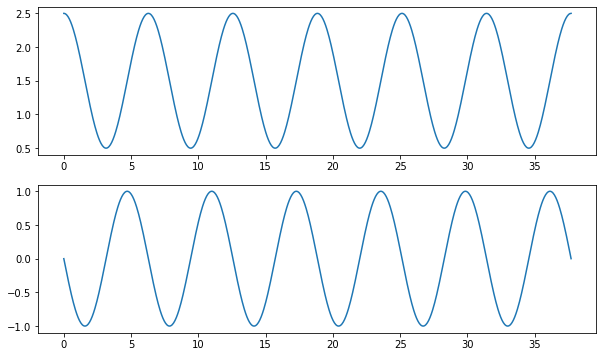

In [22]:
fig5, ax5 = plt.subplots(2,1, figsize=(10,6)) #gráficos de u(theta) e sua velocidade 
ax5[0].plot(orb.t,orb.y[0])
ax5[1].plot(orb.t,orb.y[1])

Agora, vamos ser honestos. É muito mais empolgante ver a figura da órbita do que um gráfico, não é?

Vamos então plotar a órbita em si. Para isso, devemos voltar às coordenadas $x$ e $y$ originais:

\begin{align}
  r & = \frac{1}{u}, \\
  x & = r\cos(\theta)\, \\
  y & = r\sin(\theta)\, \\
\end{align}

o que, computacionalmente é implementado definindo as variáveis:

In [23]:
u = orb.y[0]
r = 1/u
x = r*np.cos(orb.t)
y = r*np.sin(orb.t)

# Note que todas essas variáveis são arrays da numpy:

print(type(r))
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Agora a órbita é facilmente obtida plotando $y$ em função de $x$:

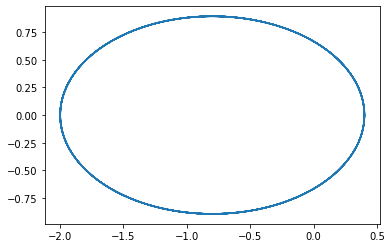

In [24]:
plt.plot(x,y)

Podemos ainda fazer uma animação da órbita da mesma forma que fizemos antes:

Ou melhor ainda, fazer um vídeo de $y$ em função de $x$:

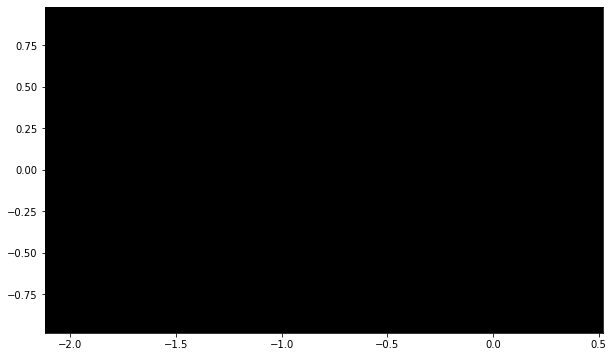

In [25]:
fig6, ax6 = plt.subplots(figsize=(10,6))
#ax6.grid(True)
ax6.set_facecolor('xkcd:black')

ax6.set_xlabel = ('x')
ax6.set_ylabel = ('y')

elipse = []
for i in range(len(orb.t)):
  curva, = ax6.plot(x[:i],y[:i], color='white') #aqui a vírgula é importante
  elipse.append([curva])

ani6 = animation.ArtistAnimation(fig6, elipse, interval = 10)

In [26]:
plt.rcParams['animation.html'] = 'html5'
ani6

### Deixando o vídeo mais interessante

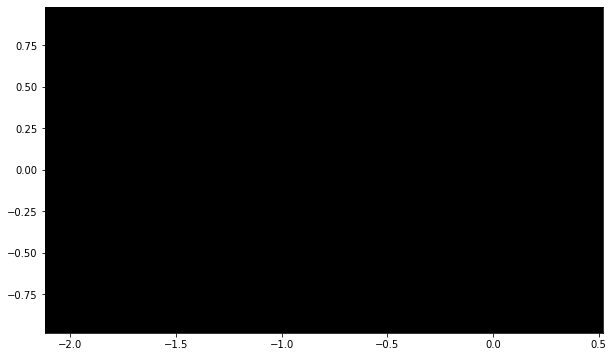

In [27]:
fig7, ax7 = plt.subplots(figsize=(10,6))
#ax7.grid(True)
ax7.set_facecolor('xkcd:black')

ax7.set_xlabel = ('x')
ax7.set_ylabel = ('y')

elipsee = []
for i in range(len(orb.t)):
  head = i - 1
  head_slice = (orb.t > orb.t[i] -1.0) & (orb.t < orb.t[i])
  curvaa, = ax7.plot(x[:i],y[:i], linestyle='-', color='white')                              #aqui a vírgula é importante
  curvab, = ax7.plot(x[head_slice], y[head_slice], marker='o', color='red', linewidth='3')
  curvae, = ax7.plot(x[head], y[head], marker='o', color='blue', linewidth='15')
  elipsee.append([curvaa,curvab,curvae])

ani7 = animation.ArtistAnimation(fig7, elipsee, interval = 20)

In [28]:
plt.rcParams['animation.html'] = 'html5'
ani7

### Variando parâmetros

Como sabemos, não existem apenas órbitas elípticas. Na verdade, estas dependem da excentricidade $\epsilon$ da seguinte forma:

$$ \epsilon = \frac{A}{F}\, ,$$

com as seguintes curvas sendo obtidas para cada caso:

\begin{align}
  \epsilon & = 0 \implies \hbox{circunferência}\, , \\
  0< \epsilon & < 1 \implies \hbox{elipse}\, , \\
  \epsilon & = 1 \implies \hbox{parábola}\, , \\
  1 < \epsilon & < \infty \implies \hbox{hipérbole}\, , \\
  \epsilon & \rightarrow \infty \implies \hbox{linha reta}\, . \\
\end{align}

Porém, como $F=GM/h^{2}$, na convenção de $GM=1$, $A=1$, temos

$$ \epsilon = h^2 \, , $$

e os tipos de curvas se relacionam com os valores do momento angular:

\begin{align}
  h  = 0 & \implies \hbox{circunferência}\, , \\
  0< h  < 1 & \implies \hbox{elipse}\, , \\
  h  = 1 & \implies \hbox{parábola}\, , \\
  1 < h  < \infty & \implies \hbox{hipérbole}\, , \\
  h  \rightarrow \infty & \implies \hbox{linha reta}\, . \\
\end{align}

Vamos então plotar uma órbita hiperbólica variando $h$. Essa órbita modela objetos semelhantes a cometas, que vem de uma distância muito grande da massa a uma alta velocidade e momento angular. Vamos implementar isso nas condições iniciais.

In [29]:
a = 150.0
u0 = 100.0 + a
v0 = 100.0
z0 = [u0,v0]
delta_theta = (-np.pi/2,np.pi/2)
hyper = solve_ivp(orbita,delta_theta,z0,max_step=0.01,args=(a,))

E as coordenadas cartesianas ficam:

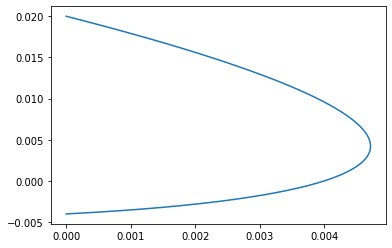

In [30]:
uh = hyper.y[0]
rh = 1/uh
xh = rh*np.cos(hyper.t)
yh = rh*np.sin(hyper.t)
plt.plot(xh,yh)

O vídeo da órbita modela bem a trajetória de cometas:

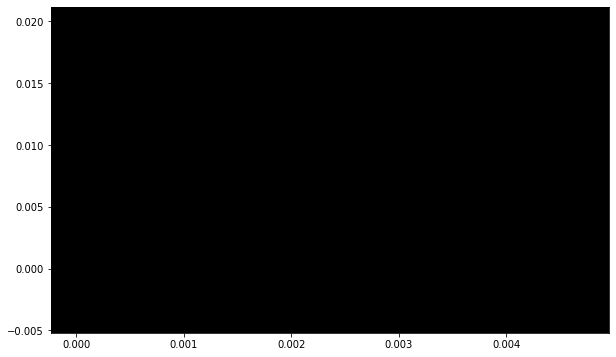

In [31]:
fig8, ax8 = plt.subplots(figsize=(10,6))
#ax7.grid(True)
ax8.set_facecolor('xkcd:black')

ax8.set_xlabel = ('x')
ax8.set_ylabel = ('y')

hyperbole = []
for i in range(len(hyper.t)):
  head = i - 1
  head_slice = (hyper.t > hyper.t[i] -1.0) & (hyper.t < hyper.t[i])
  hyperbolea, = ax8.plot(xh[:i],yh[:i], linestyle='-', color='white')                              #aqui a vírgula é importante
  hyperboleb, = ax8.plot(xh[head_slice], yh[head_slice], marker='o', color='red', linewidth='3')
  hyperbolee, = ax8.plot(xh[head], yh[head], marker='o', color='blue', linewidth='15')
  hyperbole.append([hyperbolea,hyperboleb,hyperbolee])

ani8 = animation.ArtistAnimation(fig8, hyperbole, interval = 20)

In [32]:
plt.rcParams['animation.html'] = 'html5'
ani8

### Para Casa

Plotar os outros tipos de órbita. 

**Dica**: ao variar as condições iniciais e os parâmetros, experimente mudar o intervalo das soluções.

## Órbitas Relativísticas

Na Relatividade Geral, a equação da órbita ganha uma correção, se tornando não linear:

\begin{equation}
  \frac{d^{2}u}{d\theta^{2}} + u = \frac{GM}{h^2}+\frac{3}{2}r_{s}u^2\, ,
\end{equation}

em que $r_{s}=2GM/c^{2}$ é chamado de **raio de Schwarzschild**, sendo identificado como o raio do horizonte de eventos do buraco negro. Vamos repetir nossos passos anteriores e definir um modelo para estudar essas órbitas.

In [33]:
def orbitar(t,y,a,rs):
  u = y[0]
  v = y[1]
  dudt = v
  dvdt = -u+a+((3/2)*rs)*(u**2) #equação da órbita relativística
  return [dudt,dvdt]

Resolvendo o modelo:

In [34]:
a = 1.5                                                     # momento angular 
rs = 0.01                                                   # raio do buraco negro
u0 = a-1                                                    # posição inicial
v0 = 0.0                                                    # "velocidade inicial" da órbita
z = [u0,v0]
p = (0,12*np.pi)
orbr = solve_ivp(orbitar,p,z,max_step=0.05,args=(a,rs))

Voltando para coordenadas cartesianas:

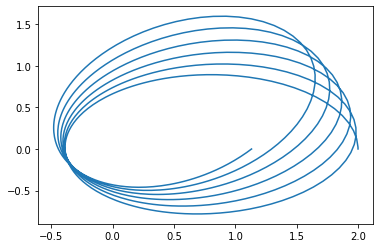

In [35]:
ur = orbr.y[0]
rr = 1/ur
xr = rr*np.cos(orbr.t)
yr = rr*np.sin(orbr.t)
plt.plot(xr,yr)

Note que a órbita é uma elipse que roda. Tal efeito é conhecido como **precessão do periélio**, sendo o primeiro efeito descrito pela Relatividade Geral. Vamos agora fazer um vídeo:

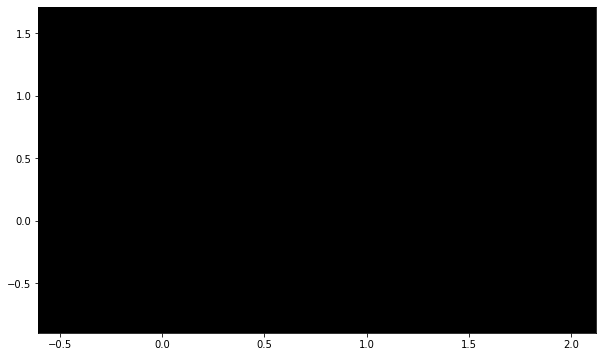

In [36]:
fig8, ax8 = plt.subplots(figsize=(10,6))
#ax8.grid(True)
ax8.set_facecolor('xkcd:black')

ax8.set_xlabel = ('x')
ax8.set_ylabel = ('y')

orbitarelativistica = []
for i in range(len(orbr.t)):
  head = i - 1
  head_slice = (orbr.t > orbr.t[i] -1.0) & (orbr.t < orbr.t[i])
  relativisticaa, = ax8.plot(xr[:i],yr[:i], linestyle='-', color='white')                              
  relativisticae, = ax8.plot(xr[head], yr[head], marker='o', color='blue', linewidth='15')
  orbitarelativistica.append([relativisticaa,relativisticae])

ani8 = animation.ArtistAnimation(fig8, orbitarelativistica, interval = 20)

plt.rcParams['animation.html'] = 'html5'
ani8

### Variando os parâmetros

As órbitas relativísticas tem um comportamento muito mais rico que as newtonianas. Vamos mostrar isso variando as condições iniciais:

NameError: ignored

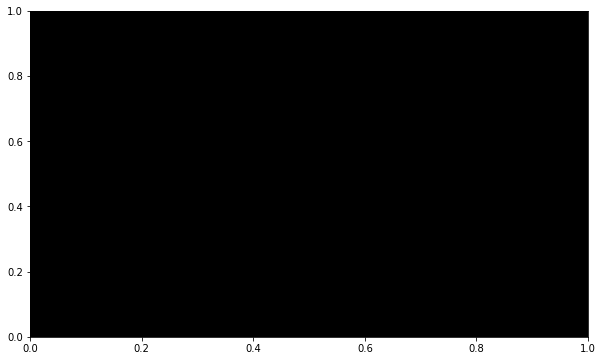

In [37]:
fig9, ax9 = plt.subplots(figsize=(10,6))
#ax10.grid(True)
ax9.set_facecolor('xkcd:black')

ax9.set_xlabel = ('x')
ax9.set_ylabel = ('y')

orbitamaluca = []
for i in range(len(orbrm.t)):
  head = i - 1
  head_slice = (orbrm.t > orbrm.t[i] -1.0) & (orbrm.t < orbrm.t[i])
  malucaa, = ax9.plot(xrm[:i],yrm[:i], linestyle='-', color='white')                              #aqui a vírgula é importante
  hyperboleb, = ax.plot(xh[head_slice], yh[head_slice], marker='o', color='red', linewidth='3')
  malucae, = ax9.plot(xrm[head], yrm[head], marker='o', color='blue', linewidth='15')
  orbitamaluca.append([malucaa,malucae])

ani9 = animation.ArtistAnimation(fig9, orbitamaluca, interval = 20)
plt.rcParams['animation.html'] = 'html5'
ani9

In [ ]:
# Órbita Maluca

am = 7.0                                                      # momento angular relativamente alto
rs = 0.01                                                     # raio do buraco negro
u0m = am                                                      # posição inicial do corpo (perto do buraco)
v0m = 10.0                                                    # "velocidade" inicial da órbita
zm = [u0,v0]
pm = (0,20*np.pi)
orbrm = solve_ivp(orbitar,pm,zm,max_step=0.05,args=(am,rs))

urm = orbrm.y[0]
rrm = 1/urm
xrm = rrm*np.cos(orbrm.t)
yrm = rrm*np.sin(orbrm.t)
plt.plot(xrm,yrm)

In [ ]:
fig10, ax10 = plt.subplots(figsize=(10,6))
#ax10.grid(True)
ax10.set_facecolor('xkcd:black')

ax10.set_xlabel = ('x')
ax10.set_ylabel = ('y')

colapso = []
for i in range(len(orbrc.t)):
  head = i - 1
  head_slice = (orbrc.t > orbrc.t[i] -1.0) & (orbrc.t < orbrm.t[i])
  colapsoa, = ax10.plot(xrc[:i],yrc[:i], linestyle='-', color='white')                              
  #hyperboleb, = ax10.plot(xh[head_slice], yh[head_slice], marker='o', color='red', linewidth='3')
  colapsoe, = ax10.plot(xrc[head], yrc[head], marker='o', color='blue', linewidth='15')
  colapso.append([colapsoa,colapsoe])

ani10 = animation.ArtistAnimation(fig10, colapso, interval = 70)

plt.rcParams['animation.html'] = 'html5'
ani10

In [ ]:
# Colapso

# aqui o objeto se encontra dentro do horizonte de eventos e colapsa na singularidade em x=0, y=0

ac = 20.0
rs = 1.0
u0c = 2/rs            # note que o raio inicial é menor que o raio rs do horizonte de eventos
v0c = 0.0
zc = [u0,v0]
pc = (0,24*np.pi)     # tente veriar o intervalo e veja o que acontece
orbrc = solve_ivp(orbitar,pc,zc,max_step=0.01,args=(ac,rs))

urc = orbrc.y[0]
rrc = 1/urc
xrc = rrc*np.cos(orbrc.t)
yrc = rrc*np.sin(orbrc.t)
plt.plot(xrc,yrc)

In [ ]:
fig10, ax10 = plt.subplots(figsize=(10,6))
#ax10.grid(True)
ax10.set_facecolor('xkcd:black')

ax10.set_xlabel = ('x')
ax10.set_ylabel = ('y')

colapso = []
for i in range(len(orbrc.t)):
  head = i - 1
  head_slice = (orbrc.t > orbrc.t[i] -1.0) & (orbrc.t < orbrm.t[i])
  colapsoa, = ax10.plot(xrc[:i],yrc[:i], linestyle='-', color='white')                              
  #hyperboleb, = ax10.plot(xh[head_slice], yh[head_slice], marker='o', color='red', linewidth='3')
  colapsoe, = ax10.plot(xrc[head], yrc[head], marker='o', color='blue', linewidth='15')
  colapso.append([colapsoa,colapsoe])

ani10 = animation.ArtistAnimation(fig10, colapso, interval = 70)



In [ ]:
def animacao(solucao,intervalo = 20):
  figs, axs = [],[] 
  figs, axs = plt.subplots(figsize=(10,6))#ax10.grid(True)
  axs.set_facecolor('xkcd:black')

  axs.set_xlabel = ('x')
  axs.set_ylabel = ('y')
  
  u = solucao.y[0]
  r = 1/u
  x = r * np.cos(solucao.t)
  y = r * np.sin(solucao.t)

  colapso = []
  for i in range(len(solucao.t)):
    head = i - 1
    head_slice = (solucao.t > solucao.t[i] -1.0) & (solucao.t < solucao.t[i])
    colapsoa, = axs.plot(x[:i],y[:i], linestyle='-', color='white')                              
    colapsoe, = axs.plot(x[head], y[head], marker='o', color='blue', linewidth='15')
    colapso.append([colapsoa,colapsoe])

  return animation.ArtistAnimation(figs, colapso, interval = intervalo)

ani =animacao(hyper, intervalo=20)

plt.rcParams['animation.html'] = 'html5'

ani

In [ ]:
type(figs)